In [83]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import folium

from sklearn.preprocessing import StandardScaler
import geopandas as gpd

In [84]:
# Reading Trader Joe's locations data set 
tj = pd.read_csv('data/trader_joes.csv')

In [85]:
tj.head()

,name,full_address,street_address,city,state,zip_code,latitude,longitude,phone_numbers
0,Trader Joe's Birmingham (737),"205 Summit Blvd, Suite 100, Birmingham, AL, 35243","205 Summit Blvd, Suite 100",Birmingham,AL,35243,33.446446,-86.729614,[]
1,Trader Joe's Huntsville (785),"1100 Mid City Dr NW, Huntsville, AL, 35806",1100 Mid City Dr NW,Huntsville,AL,35806,34.740071,-86.665122,[]
2,Trader Joe's Little Rock (756),"11500 Financial Centre Pky, Little Rock, AR, 7...",11500 Financial Centre Pky,Little Rock,AR,72211,34.748287,-92.401854,[]
3,Trader Joe's Chandler (287),"3961 S Arizona Ave, Chandler, AZ, 85248",3961 S Arizona Ave,Chandler,AZ,85248,33.249066,-111.838202,[]
4,Trader Joe's Gilbert (Santan) (285),"1779 E. Williams Field Rd., Gilbert, AZ, 85295",1779 E. Williams Field Rd.,Gilbert,AZ,85295,33.306439,-111.751705,[]


In [86]:
# Dropping the phone_numbers column as it has no information 
tj.drop(columns = 'phone_numbers', inplace=True)

In [87]:
tj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            578 non-null    object 
 1   full_address    578 non-null    object 
 2   street_address  578 non-null    object 
 3   city            578 non-null    object 
 4   state           578 non-null    object 
 5   zip_code        578 non-null    int64  
 6   latitude        578 non-null    float64
 7   longitude       578 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 36.3+ KB


In [88]:
tj.isna().sum()

name              0
full_address      0
street_address    0
city              0
state             0
zip_code          0
latitude          0
longitude         0
dtype: int64

In [89]:
tj['zip_code'].nunique()

558

##### Where are the Trader Joe's stores located? 

In [90]:
# Create a map centered around the US
us_location = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add markers for each store location
for index, row in tj.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']]
    ).add_to(us_location)

# Display map
us_location

In [91]:
# Reading census data set 
income = pd.read_csv('data/us_income_zipcode.csv')

In [92]:
income.head()

,ZIP,Geography,Geographic Area Name,Households,Households Margin of Error,"Households Less Than $10,000","Households Less Than $10,000 Margin of Error","Households $10,000 to $14,999","Households $10,000 to $14,999 Margin of Error","Households $15,000 to $24,999",...,"Nonfamily Households $150,000 to $199,999","Nonfamily Households $150,000 to $199,999 Margin of Error","Nonfamily Households $200,000 or More","Nonfamily Households $200,000 or More Margin of Error",Nonfamily Households Median Income (Dollars),Nonfamily Households Median Income (Dollars) Margin of Error,Nonfamily Households Mean Income (Dollars),Nonfamily Households Mean Income (Dollars) Margin of Error,Nonfamily Households Nonfamily Income in the Past 12 Months,Year
0,601,860Z200US00601,ZCTA5 00601,5397.0,264.0,33.2,4.4,15.7,2.9,23.9,...,0.0,2.8,0.0,2.8,9386.0,1472.0,13044.0,1949.0,15.0,2021.0
1,602,860Z200US00602,ZCTA5 00602,12858.0,448.0,27.1,2.9,12.7,2.1,20.5,...,0.0,1.3,0.0,1.3,11242.0,1993.0,16419.0,2310.0,20.1,2021.0
2,603,860Z200US00603,ZCTA5 00603,19295.0,555.0,32.1,2.5,13.4,1.6,17.2,...,0.6,0.6,0.2,0.4,10639.0,844.0,16824.0,2217.0,34.9,2021.0
3,606,860Z200US00606,ZCTA5 00606,1968.0,171.0,28.4,5.5,13.3,4.4,23.3,...,0.0,7.5,0.0,7.5,15849.0,3067.0,16312.0,2662.0,13.0,2021.0
4,610,860Z200US00610,ZCTA5 00610,8934.0,372.0,20.5,2.5,13.2,2.5,23.3,...,0.0,1.8,0.0,1.8,12832.0,2405.0,16756.0,1740.0,14.5,2021.0


In [93]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364998 entries, 0 to 364997
Columns: 111 entries, ZIP to Year
dtypes: float64(108), int64(1), object(2)
memory usage: 309.1+ MB


In [94]:
income['Year'].dtypes

dtype('float64')

Are all the zipcodes in the trader joe's data set are also in the income datase? 

In [95]:
# convert the year column to an int 
income['Year'] = income['Year'].astype(int)

In [96]:
tj['zip_code'].nunique()

558

In [97]:
income['ZIP'].nunique()

33995

In [98]:
# Convert ZIP codes to strings
tj_str = tj['zip_code'].astype(str)
income_str = income['ZIP'].astype(str)

# Check for occurrences and count them
occurrences = sum(tj_zip in income_str.unique() for tj_zip in tj_str.unique())

# Print the count
print(f"Number of occurrences: {occurrences}")

Number of occurrences: 558


In [99]:
income.columns

Index(['ZIP', 'Geography', 'Geographic Area Name', 'Households',
       'Households Margin of Error', 'Households Less Than $10,000',
       'Households Less Than $10,000 Margin of Error',
       'Households $10,000 to $14,999',
       'Households $10,000 to $14,999 Margin of Error',
       'Households $15,000 to $24,999',
       ...
       'Nonfamily Households $150,000 to $199,999',
       'Nonfamily Households $150,000 to $199,999 Margin of Error',
       'Nonfamily Households $200,000 or More',
       'Nonfamily Households $200,000 or More Margin of Error',
       'Nonfamily Households Median Income (Dollars)',
       'Nonfamily Households Median Income (Dollars) Margin of Error',
       'Nonfamily Households Mean Income (Dollars)',
       'Nonfamily Households Mean Income (Dollars) Margin of Error',
       'Nonfamily Households Nonfamily Income in the Past 12 Months', 'Year'],
      dtype='object', length=111)

In [100]:
# Get the column names containing "Margin of Error" to drop them 
margin_columns = [col for col in income.columns if 'Margin of Error' in col]

# Drop the columns that won't be needed 
income = income.drop(columns=margin_columns)
income = income.drop(columns = ['Geography', 'Geographic Area Name'])

In [101]:
income.isna().sum()

ZIP                                                                 0
Households                                                         59
Households Less Than $10,000                                     6925
Households $10,000 to $14,999                                    6925
Households $15,000 to $24,999                                    6925
Households $25,000 to $34,999                                    6925
Households $35,000 to $49,999                                    6925
Households $50,000 to $74,999                                    6925
Households $75,000 to $99,999                                    6925
Households $100,000 to $149,999                                  6925
Households $150,000 to $199,999                                  6925
Households $200,000 or More                                      6925
Households Median Income (Dollars)                              20485
Households Mean Income (Dollars)                                13622
Households Household

In [102]:
income.isna().mean()

ZIP                                                            0.000000
Households                                                     0.000162
Households Less Than $10,000                                   0.018973
Households $10,000 to $14,999                                  0.018973
Households $15,000 to $24,999                                  0.018973
Households $25,000 to $34,999                                  0.018973
Households $35,000 to $49,999                                  0.018973
Households $50,000 to $74,999                                  0.018973
Households $75,000 to $99,999                                  0.018973
Households $100,000 to $149,999                                0.018973
Households $150,000 to $199,999                                0.018973
Households $200,000 or More                                    0.018973
Households Median Income (Dollars)                             0.056124
Households Mean Income (Dollars)                               0

In [103]:
# The column Married-Couple Families Mean Income (Dollars) has a lot of missing values, dropping it
income.drop(columns=['Married-Couple Families Mean Income (Dollars)'], inplace=True)

In [104]:
# Count the number of rows with no missing values
rows_with_no_missing_values = income.dropna(axis=0)

# Calculate the proportion of rows with no missing values
proportion_no_missing_values = len(rows_with_no_missing_values) / len(income)

In [105]:
proportion_no_missing_values

0.8071441487350616

In [106]:
# income data set with no missing values 
income = rows_with_no_missing_values
income.head()

,ZIP,Households,"Households Less Than $10,000","Households $10,000 to $14,999","Households $15,000 to $24,999","Households $25,000 to $34,999","Households $35,000 to $49,999","Households $50,000 to $74,999","Households $75,000 to $99,999","Households $100,000 to $149,999",...,"Nonfamily Households $35,000 to $49,999","Nonfamily Households $50,000 to $74,999","Nonfamily Households $75,000 to $99,999","Nonfamily Households $100,000 to $149,999","Nonfamily Households $150,000 to $199,999","Nonfamily Households $200,000 or More",Nonfamily Households Median Income (Dollars),Nonfamily Households Mean Income (Dollars),Nonfamily Households Nonfamily Income in the Past 12 Months,Year
0,601,5397.0,33.2,15.7,23.9,13.4,8.7,3.5,0.7,0.9,...,3.6,0.3,0.9,0.0,0.0,0.0,9386.0,13044.0,15.0,2021
1,602,12858.0,27.1,12.7,20.5,14.3,10.9,8.2,3.3,2.0,...,6.0,3.2,1.8,0.0,0.0,0.0,11242.0,16419.0,20.1,2021
2,603,19295.0,32.1,13.4,17.2,9.9,9.3,10.2,4.1,2.5,...,4.4,4.7,1.1,0.5,0.6,0.2,10639.0,16824.0,34.9,2021
3,606,1968.0,28.4,13.3,23.3,15.4,11.0,7.7,0.7,0.3,...,4.6,3.0,0.0,0.0,0.0,0.0,15849.0,16312.0,13.0,2021
4,610,8934.0,20.5,13.2,23.3,15.7,11.5,9.8,3.4,1.7,...,7.0,3.0,0.0,0.0,0.0,0.0,12832.0,16756.0,14.5,2021


In [107]:
# Create a set of unique ZIP codes in 'tj' DataFrame
tj_zip_set = set(tj['zip_code'])

# Create a new column 'store_presence' in 'income' DataFrame
income['store_presence'] = income['ZIP'].apply(lambda x: 1 if x in tj_zip_set else 0)

In [108]:
income['store_presence'].value_counts()

store_presence
0    288700
1      5906
Name: count, dtype: int64

In [65]:
# Check for duplicate ZIP codes
income['ZIP'].value_counts()

ZIP
601      11
76638    11
76648    11
76645    11
76643    11
         ..
95934     1
50631     1
19437     1
95545     1
99923     1
Name: count, Length: 30950, dtype: int64

We will narrow our income table to the most recent year = 2021

In [66]:
income_2021 = income[income['Year'] == 2021]

In [67]:
income_2021.head()

,ZIP,Households,"Households Less Than $10,000","Households $10,000 to $14,999","Households $15,000 to $24,999","Households $25,000 to $34,999","Households $35,000 to $49,999","Households $50,000 to $74,999","Households $75,000 to $99,999","Households $100,000 to $149,999",...,"Nonfamily Households $50,000 to $74,999","Nonfamily Households $75,000 to $99,999","Nonfamily Households $100,000 to $149,999","Nonfamily Households $150,000 to $199,999","Nonfamily Households $200,000 or More",Nonfamily Households Median Income (Dollars),Nonfamily Households Mean Income (Dollars),Nonfamily Households Nonfamily Income in the Past 12 Months,Year,store_presence
0,601,5397.0,33.2,15.7,23.9,13.4,8.7,3.5,0.7,0.9,...,0.3,0.9,0.0,0.0,0.0,9386.0,13044.0,15.0,2021,0
1,602,12858.0,27.1,12.7,20.5,14.3,10.9,8.2,3.3,2.0,...,3.2,1.8,0.0,0.0,0.0,11242.0,16419.0,20.1,2021,0
2,603,19295.0,32.1,13.4,17.2,9.9,9.3,10.2,4.1,2.5,...,4.7,1.1,0.5,0.6,0.2,10639.0,16824.0,34.9,2021,0
3,606,1968.0,28.4,13.3,23.3,15.4,11.0,7.7,0.7,0.3,...,3.0,0.0,0.0,0.0,0.0,15849.0,16312.0,13.0,2021,0
4,610,8934.0,20.5,13.2,23.3,15.7,11.5,9.8,3.4,1.7,...,3.0,0.0,0.0,0.0,0.0,12832.0,16756.0,14.5,2021,0


In [68]:
# saving the new dataset 
#income_2021.to_csv('income_2021.csv', index = False)

### EDA

In [69]:
# Count the number of ZIP codes per store presence category
store_presence_counts = income_2021['store_presence'].value_counts()
store_presence_counts

store_presence
0    25689
1      556
Name: count, dtype: int64

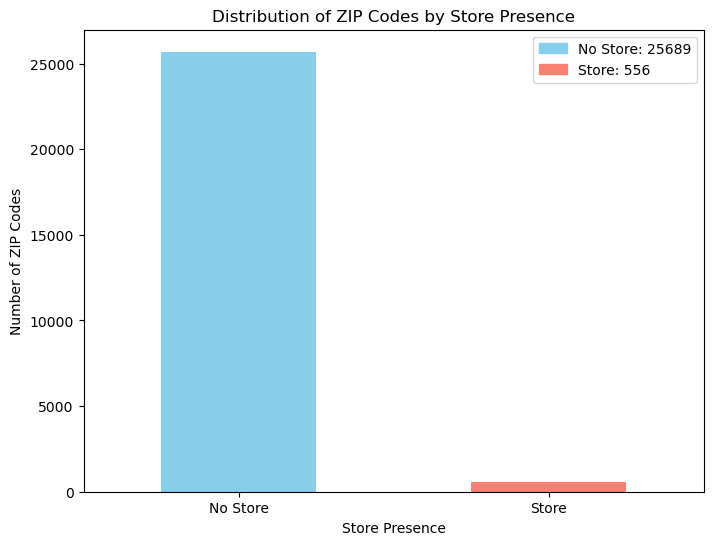

In [77]:
# graph to visualize zipcodes per store presence category 

colors = ['skyblue', 'salmon']

# Plot the distribution
plt.figure(figsize=(8, 6))
bars = store_presence_counts.plot(kind='bar', color=colors)

# Adding titles and labels
plt.title('Distribution of ZIP Codes by Store Presence')
plt.xlabel('Store Presence')
plt.ylabel('Number of ZIP Codes')
plt.xticks(ticks=[0, 1], labels=['No Store', 'Store'], rotation=0)

# Creating legend handles with counts
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
labels = [f'No Store: {store_presence_counts[0]}', f'Store: {store_presence_counts[1]}']
plt.legend(handles, labels, loc='upper right');

There are 25_689 zip codes without any Trader Joe's store presence, whereas only 556 zip codes have at least one store. This distribution underscores the uneven distribution of Trader Joe's stores across zip code areas. 

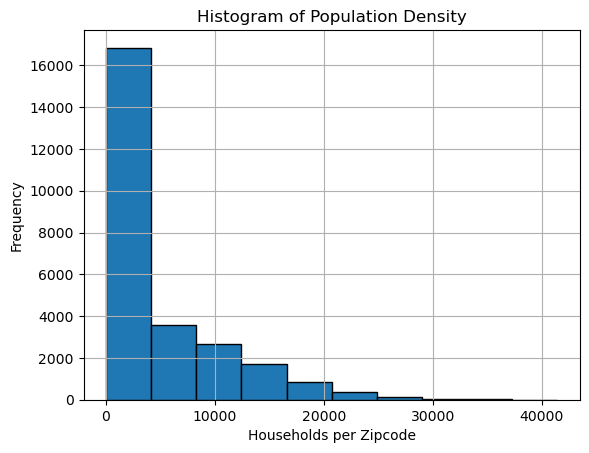

In [71]:
# Plotting the household income 
income_2021['Households'].hist(edgecolor='black')
plt.xlabel('Households per Zipcode')
plt.ylabel('Frequency')
plt.title('Histogram of Population Density');

In [72]:
income_2021[['Households Median Income (Dollars)','Families Median Income (Dollars)', 'Married-Couple Families Median Income (Dollars)', 'Nonfamily Households Median Income (Dollars)']].describe().round()

,Households Median Income (Dollars),Families Median Income (Dollars),Married-Couple Families Median Income (Dollars),Nonfamily Households Median Income (Dollars)
count,26245.0,26245.0,26245.0,26245.0
mean,67785.0,82458.0,93412.0,40280.0
std,27961.0,32865.0,34180.0,18401.0
min,5746.0,4250.0,2500.0,2500.0
25%,50000.0,61719.0,71875.0,27931.0
50%,61923.0,75750.0,86154.0,36875.0
75%,78698.0,94833.0,106250.0,48559.0
max,250000.0,250000.0,250000.0,250000.0


There's a notable difference between the median income of married-couple families and nonfamily households. The quartiles (25th, 50th, and 75th percentiles) provide insight into income distribution within each category The maximum value of $250,000 suggests that there are households or families with very high incomes, although this is likely not representative of the majority.

In [73]:
# Identify the variables that exhibit significant differences between two groups in the 'store_presence' column and which variables might be important predictors or indicators of store presence

results = []

# Cycle over each column
for col in income_2021.columns:
    # Skip columns that are not relevant for analysis (store_presence, ZIP, Year)
    if col not in ['store_presence', 'ZIP', 'Year']:
        # Calculate mean difference with original sign
        mean_diff = np.mean(income_2021[col][income_2021['store_presence'] == 1]) - np.mean(income_2021[col][income_2021['store_presence'] == 0])
        
        # Calculate absolute Z-score correctly
        std_dev = np.std(income_2021[col], ddof=1)
        z_score = np.abs(mean_diff / std_dev)
        
        # Append results to list
        results.append({'Variable': col, 'Mean Difference': mean_diff, 'Absolute Z-Score': z_score})

# Create DataFrame from the results list
results_df = pd.DataFrame(results)

# Sort DataFrame by absolute Z-score
results_df = results_df.sort_values(by='Absolute Z-Score', ascending=False)

# Display results
results_df

,Variable,Mean Difference,Absolute Z-Score
38,"Married-Couple Families $200,000 or More",22.189497,1.871671
40,Nonfamily Households,4215.551156,1.848034
24,"Families $200,000 or More",19.224771,1.814650
26,Families Mean Income (Dollars),76237.961917,1.699746
39,Married-Couple Families Median Income (Dollars),57910.290548,1.694279
0,Households,9758.446108,1.675096
10,"Households $200,000 or More",13.756134,1.639885
28,Married-Couple Families,4565.630707,1.630055
25,Families Median Income (Dollars),51843.948061,1.577475
12,Households Mean Income (Dollars),57148.446004,1.521523


The mean difference helps to understand how income levels influence the likelihood of a store being present in an area. A positive mean difference indicates that areas with a store presence have higher incomes on average, while a negative mean difference suggests that areas without a store presence have lower incomes on average. The absolute Z-score helps us identify which variables have the most significant impact on the presence of a store, regardless of whether the mean income is higher or lower in areas with a store presence compared to those without. A higher absolute Z-score indicates a greater impact of income differences on store presence for a particular variable.

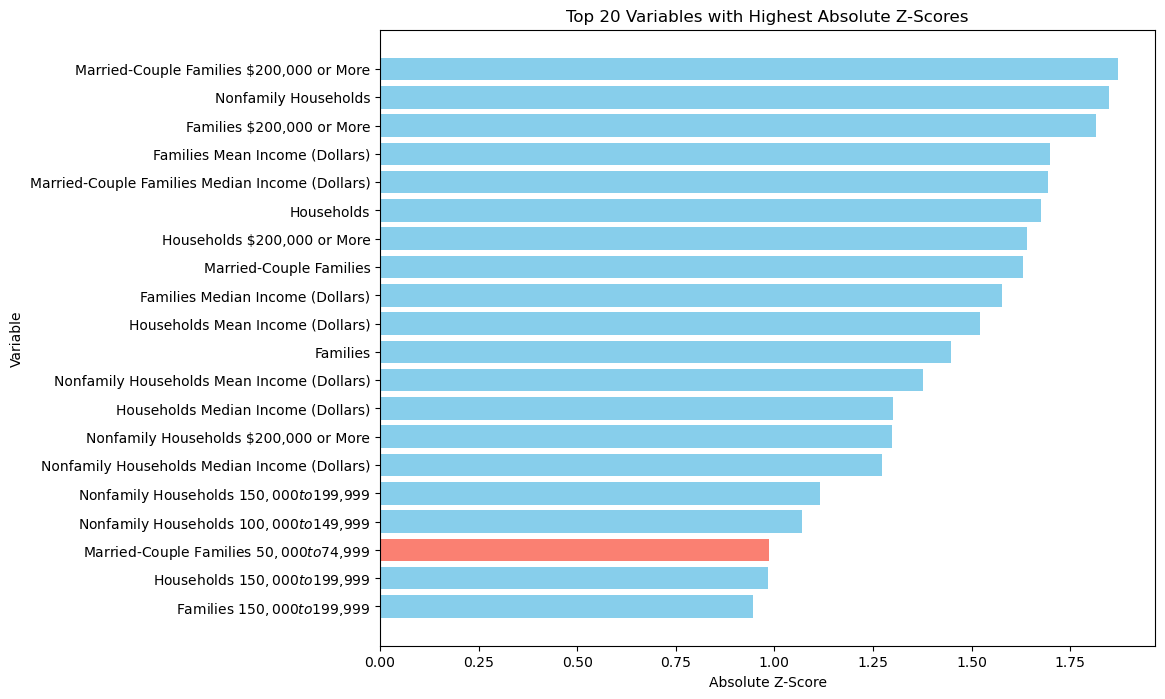

In [75]:
# Select the top 20 rows with highest absolute Z-score
top_20 = results_df.nlargest(20, 'Absolute Z-Score')

# Define colors based on the sign of the mean difference
colors = ['skyblue' if mean_diff > 0 else 'salmon' for mean_diff in top_20['Mean Difference']]

# Create the horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(top_20['Variable'], top_20['Absolute Z-Score'], color=colors)
plt.xlabel('Absolute Z-Score')
plt.ylabel('Variable')
plt.title('Top 20 Variables with Highest Absolute Z-Scores')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest score at the top

Married-Couples househols with incomes of 200k or more, non-family households and families earning 200k or more are the top three variables that strongly influence the presence of a store. Conversely, married-couple families with incomes ranging between 50k to 75k significantly influence the absence of store presence.

#### Using Geopandas to map the US zipcodes and locate the Trader Joe's stores 

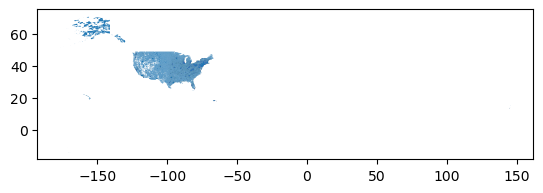

In [3]:
# Path to the shapefile
shapefile_path = "zip_codes_pol/tl_2019_us_zcta510.shp"

# Read the shapefile
gdf = gpd.read_file(shapefile_path)

# Plot the shapefile
gdf.plot()
plt.show()

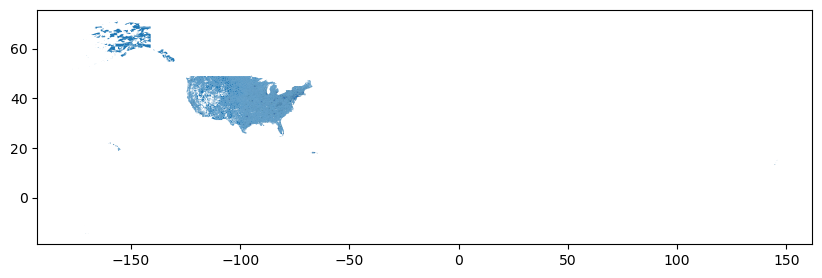

In [4]:
# Filter out rows with null or empty geometries
gdf = gdf[~gdf['geometry'].is_empty]

# Plot the shapefile
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax)
plt.show()

In [39]:
gdf

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,43451,43451,B5,G6350,S,63484186,157689,+41.3183010,-083.6174935,"POLYGON ((-83.70873 41.32733, -83.70815 41.327..."
1,43452,43452,B5,G6350,S,121522304,13721730,+41.5157923,-082.9809454,"POLYGON ((-83.08698 41.53780, -83.08256 41.537..."
2,43456,43456,B5,G6350,S,9320975,1003775,+41.6318300,-082.8393923,"MULTIPOLYGON (((-82.83558 41.71082, -82.83515 ..."
3,43457,43457,B5,G6350,S,48004681,0,+41.2673301,-083.4274872,"POLYGON ((-83.49650 41.25371, -83.48382 41.253..."
4,43458,43458,B5,G6350,S,2573816,39915,+41.5304461,-083.2133648,"POLYGON ((-83.22229 41.53102, -83.22228 41.532..."
...,...,...,...,...,...,...,...,...,...,...
33139,84044,84044,B5,G6350,S,123283611,69912363,+40.7201095,-112.1549645,"POLYGON ((-112.26022 40.76909, -112.25333 40.7..."
33140,84045,84045,B5,G6350,S,52780589,105248,+40.3364908,-111.9111905,"MULTIPOLYGON (((-111.92421 40.17034, -111.9240..."
33141,84046,84046,B5,G6350,S,333205012,4460752,+40.9207693,-109.8310453,"POLYGON ((-110.00072 40.99745, -110.00036 40.9..."
33142,84047,84047,B5,G6350,S,16172461,0,+40.6152301,-111.8907499,"POLYGON ((-111.92141 40.62772, -111.92134 40.6..."


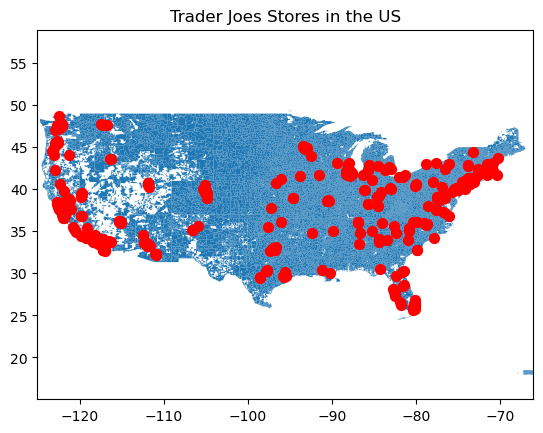

In [40]:
# Plotting TJ's stores in the US 
fig, ax = plt.subplots()

# Plot the map from gdf GeoDataFrame
gdf.plot(ax=ax)

# Plot the store locations from tj DataFrame using latitude and longitude
ax.scatter(tj['longitude'], tj['latitude'], color='red', marker='o', s=50)

# Set the limits to the continental area of the United States
ax.set_xlim([-125, -66])  # Set x limits from -125 to -66 degrees longitude
ax.set_ylim([25, 49])     # Set y limits from 25 to 49 degrees latitude

# Add title 
ax.set_title('Trader Joes Stores in the US')

# Improve aspect ratio for geographic accuracy
ax.set_aspect('equal', adjustable='datalim')

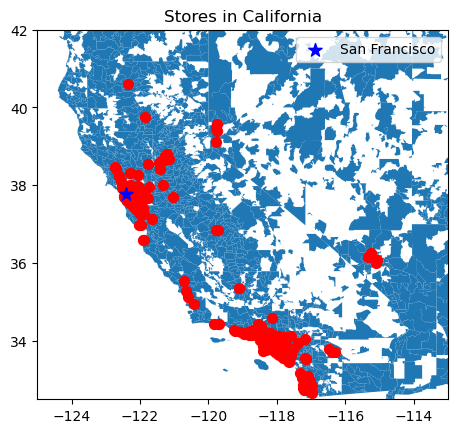

In [74]:
# Plotting California
fig, ax = plt.subplots()

# Plot the map of California from the filtered GeoDataFrame
gdf.plot(ax=ax)

# Plot the store locations from tj DataFrame using latitude and longitude
ax.scatter(tj['longitude'], tj['latitude'], color='red', marker='o', s=50)

# Plot San Francisco
san_francisco_longitude = -122.4194
san_francisco_latitude = 37.7749
ax.scatter(san_francisco_longitude, san_francisco_latitude, color='blue', marker='*', s=100, label='San Francisco') 

# Set the limits to the state of California
ax.set_xlim([-125, -113])  # Set x limits for California's longitude
ax.set_ylim([32.5, 42])     # Set y limits for California's latitude

# Add title 
ax.set_title('Stores in California')

# Add legend
ax.legend();

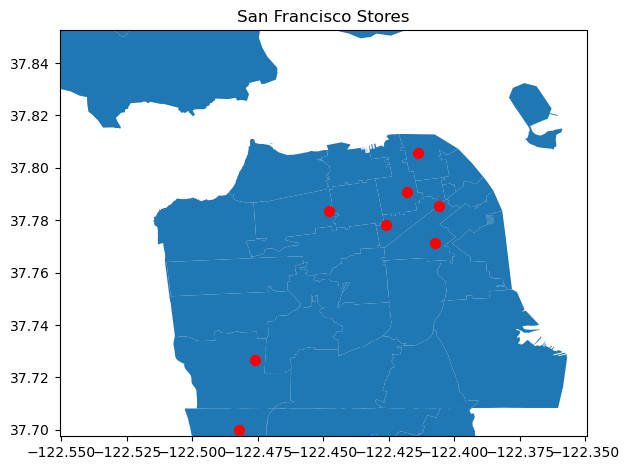

In [8]:
# Plotting Stores in San Francisco 
fig, ax = plt.subplots()

# Plot the map of California from the filtered GeoDataFrame
gdf.plot(ax=ax)

# Plot the store locations from tj DataFrame using latitude and longitude
ax.scatter(tj['longitude'], tj['latitude'], color='red', marker='o', s=50)

# Plot San Francisco as a reference point
san_francisco_longitude = -122.4194
san_francisco_latitude = 37.7749

# Set the limits to focus on San Francisco
ax.set_xlim([-122.55, -122.35])  # Set x limits for longitude around San Francisco
ax.set_ylim([37.7, 37.85])       # Set y limits for latitude around San Francisco

# Add title 
ax.set_title('San Francisco Stores')

# Improve aspect ratio for geographic accuracy
ax.set_aspect('equal', adjustable='datalim')

plt.tight_layout();

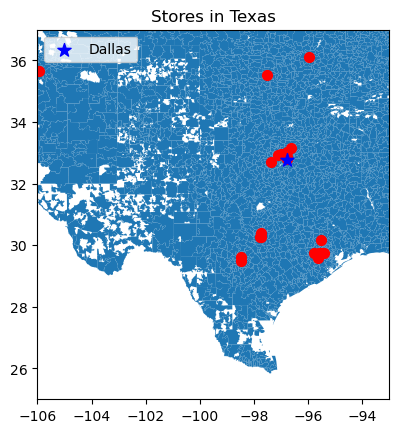

In [10]:
# Plotting Stores in Texas  
fig, ax = plt.subplots()

# Plot the map of Texas from the filtered GeoDataFrame
gdf.plot(ax=ax)

# Plot the store locations from tj DataFrame using latitude and longitude
ax.scatter(tj['longitude'], tj['latitude'], color='red', marker='o', s=50)

# Plot Dallas as a reference point
dallas_longitude = -96.7970
dallas_latitude = 32.7767
ax.scatter(dallas_longitude, dallas_latitude, color='blue', marker='*', s=100, label='Dallas') 

# Set the limits to the state of Texas
ax.set_xlim([-106, -93])  # Set x limits for Texas's longitude
ax.set_ylim([25, 37])       # Set y limits for Texas's latitude

# Add title 
ax.set_title('Stores in Texas')

# Add legend
ax.legend();

Although Texas is geographically larger than California, there is a notable disparity in the number of Trader Joe's stores between the two states. California boasts a significantly higher concentration of Trader Joe's stores compared to Texas